In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

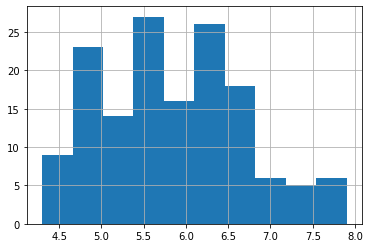

In [7]:
df['sepal_length'].hist()

<AxesSubplot:>

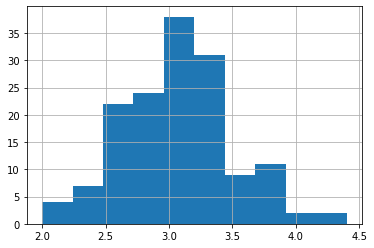

In [8]:
df['sepal_width'].hist()

<AxesSubplot:>

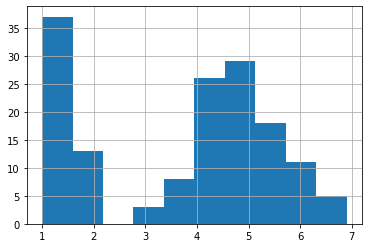

In [9]:
df['petal_length'].hist()

<AxesSubplot:>

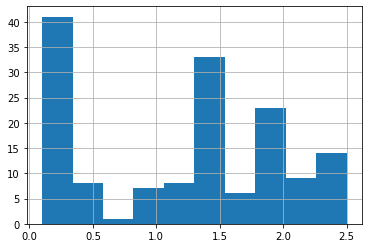

In [10]:
df['petal_width'].hist()

In [11]:
# scatters plo

colors = ['red','orange','blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

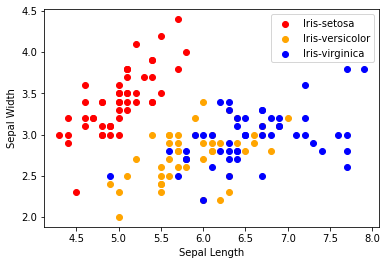

In [12]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c= colors[i], label = species[i])
plt.xlabel('Sepal Length') 
plt.ylabel('Sepal Width')
plt.legend() #used to print information in box

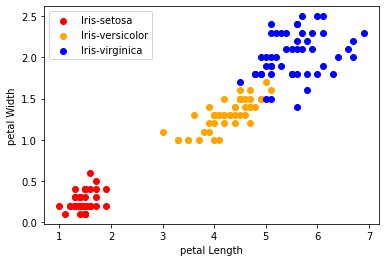

In [13]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c= colors[i], label = species[i])
plt.xlabel('petal Length') 
plt.ylabel('petal Width')
plt.legend() #used to print information in box

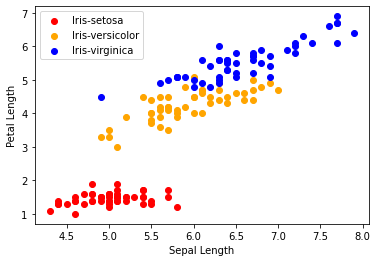

In [14]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c= colors[i], label = species[i])
plt.xlabel('Sepal Length') 
plt.ylabel('Petal Length')
plt.legend() #used to print information in box

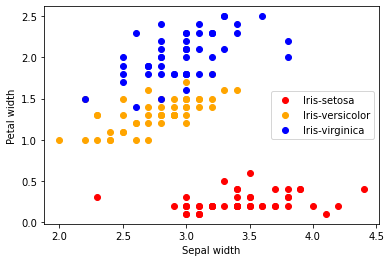

In [15]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c= colors[i], label = species[i])
plt.xlabel('Sepal width') 
plt.ylabel('Petal width')
plt.legend() #used to print information in box

# CORRELATION

In [16]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

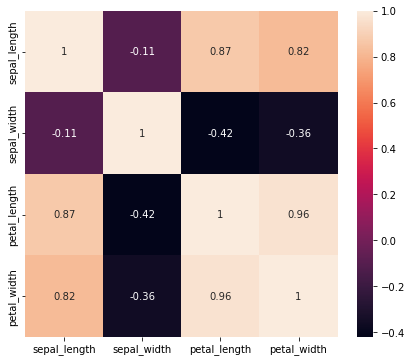

In [17]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(7,6))
sns.heatmap(corr, annot = True, ax=ax)

# LABEL ENCODER

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
df['species'] = le.fit_transform(df['species'])
df.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# MODEL TRAINING

In [98]:
from sklearn.model_selection import train_test_split
#train - 70
#test - 30
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [99]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [100]:
#model training
model.fit(x_train, y_train) #give input output parameters to train the model

LogisticRegression()

In [101]:
#print matric to get performance
Accuracy_Score = model.score(x_test, y_test)
print('Accuracy Score of Test data set: {:.2f}%'.format(Accuracy_Score*100)) #tesing model with test dataset

Accuracy Score of Test data set: 95.56%


Knn model

In [102]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier()

In [103]:
KNNmodel.fit(x_train, y_train)

KNeighborsClassifier()

In [104]:
#print matric to get performance
KNN_Accuracy_Score = KNNmodel.score(x_test, y_test)
print('Accuracy Score of Test data set: {:.2f}%'.format(KNN_Accuracy_Score*100)) #tesing model with test dataset

Accuracy Score of Test data set: 97.78%


Decission Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier
BTmodel = DecisionTreeClassifier()

In [106]:
BTmodel.fit(x_train, y_train)

DecisionTreeClassifier()

In [107]:
BT_Accuracy_Score = BTmodel.score(x_test, y_test)
print('Accuracy Score of Test data set: {:.2f}%'.format(BT_Accuracy_Score*100))

Accuracy Score of Test data set: 97.78%
